In [1]:
import pandas as pd
pd.set_option("display.float_format", "{:.3f}".format)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import Bunch
from sklearn.metrics import (
    balanced_accuracy_score,
    roc_auc_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay)
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import shap
import seaborn as sns
from IPython.display import display, Markdown, Latex


In [32]:
dff = pd.read_csv('/Users/kayadetunji/Documents/AWI_GEN_PROJECT/cvd_data_awigenv1.csv').drop(columns = 
       ['Unnamed: 0', 'study_id', 'chf_meds_qc','angina_meds_qc', 'pain_action_stop_or_slow_qc', 'pain_action_rest_qc',
       'pain_action_medicine_qc', 'pain_action_carry_on_qc',
       'relief_standstill_qc', 'relief_standstill_qc.1', 'pain_location_1_qc',
       'pain_location_2_qc', 'pain_location_3_qc', 'pain_location_4_qc',
       'pain_location_5_qc', 'pain_location_6_qc', 'pain_location_7_qc',
       'pain_location_8_qc', 'pain_location_9_qc', 'pain_location_10_qc',
       'pain_location_11_qc', 'pain_location_12_qc', 'pain_location_13_qc',
       'pain_location_14_qc', 'pain_location_15_qc', 'pain_location_16_qc',
       'pain_location_17_qc', 'pain_location_18_qc','angina_treat_now_qc', 'angina_traditional_qc', 'pain_qc', 'pain2_qc'])

In [42]:
predictor_cols = ['site', 'age', 'sex', 'number_of_children_c', 
        'partnership_status_c_qc', 'highest_level_of_education_qc', 'occupation_qc',
       'ses_site_quintile_c_qc', 'smoking_status_c_qc', 'alcohol_use_status_c_qc', 
#        'days_fruit_qc', 'days_veg_qc', 'days_bread_qc', 'sugardrinks_qc', 
       'avg_sleep_per_night_c', 'mvpa_c',
#        'asthma_qc', 
       'obesity_mom_qc','hiv_final_status_c', 'pesticide_qc',
       'waist_circumference_qc', 'hip_circumference_qc', 
       'waist_hip_r_c_qc','bp_sys_average_qc', 'pulse_average_qc',
       'visceral_fat_qc', 'subcutaneous_fat_qc', 'mean_cimt_right_qc',
       'mean_cimt_left_qc', 'ldl_qc', 'triglycerides_qc',
       'acr_qc','bmi_c_qc', 'cholesterol_1_qc']
outcome_cols = ['CVD']

In [4]:
# Simple Function to calcuate CVD
def calculate_CVD(a,b,c,d,e):
    col=0
    if (int(a)==1 or int(b)==1 or int(c)==1 or int(d)==1 or int(e)==1):
        col=1
    elif (int(a)==0 and int(b)==0 and int(c)==0 and int(d)==0 and int(e)==0):
        col = 0
    elif (int(a)==pd.isna and int(b)==pd.isna and int(c)==pd.isna and int(d)==pd.isna and int(e)==pd.isna):
        col = 0
    return col

In [35]:
# Applying the condition
# dff['gender'].mask(dff['gender'] == 'female', 0, inplace=True)
# dff.loc[dff.iloc[:] == -999] 
dff1 = dff.replace([-999, -222, -111], np.nan).copy()

In [29]:
dff1

site  age  sex  number_of_children_c  partnership_status_c_qc  \
0         1   80    1                10.000                    1.000   
1         1   73    1                 5.000                    1.000   
2         1   80    1                 9.000                    2.000   
3         1   79    0                 4.000                    1.000   
4         1   73    0                 7.000                    2.000   
...     ...  ...  ...                   ...                      ...   
12027     6   57    0                   NaN                    2.000   
12028     2   50    0                 3.000                    0.000   
12029     1   76    1                 3.000                    1.000   
12030     2   59    0                 7.000                    2.000   
12031     1   74    0                 6.000                    2.000   

       highest_level_of_education_qc  occupation_qc  ses_site_quintile_c_qc  \
0                              0.000            NaN                   1.000   
1                              0.000          4.000                   4.000   
2                              0.000          4.000                   2.000   
3                              0.000          3.000                   2.000   
4                              0.000          3.000                   3.000   
...                              ...            ...                     ...   
12027                          1.000          1.000                   2.000   
12028                          2.000          1.000                   2.000   
12029                          0.000          4.000                   1.000   
12030                          2.000          3.000                   5.000   
12031                          0.000          4.000                   2.000   

       smoking_status_c_qc  alcohol_use_status_c_qc  ...  \
0                    2.000                    3.000  ...   
1                    0.000                    3.000  ...   
2                    0.000                    0.000  ...   
3                    0.000                    0.000  ...   
4                    0.000                    0.000  ...   
...                    ...                      ...  ...   
12027                0.000                      NaN  ...   
12028                0.000                    0.000  ...   
12029                0.000                    1.000  ...   
12030                0.000                    0.000  ...   
12031                0.000                    3.000  ...   

       heartattack_traditional_qc  congestive_heart_failure_qc  \
0                           0.000                        0.000   
1                           0.000                        0.000   
2                           0.000                        0.000   
3                           0.000                        0.000   
4                           0.000                        0.000   
...                           ...                          ...   
12027                         NaN                          NaN   
12028                       0.000                        0.000   
12029                       0.000                        0.000   
12030                       0.000                        2.000   
12031                       0.000                        0.000   

       chf_treatment_yn_qc  chf_treat_now_qc  chf_traditional_qc  \
0                      NaN               NaN               0.000   
1                      NaN               NaN               0.000   
2                      NaN               NaN               0.000   
3                      NaN               NaN               0.000   
4                      NaN               NaN               0.000   
...                    ...               ...                 ...   
12027                  NaN               NaN                 NaN   
12028                  NaN               NaN               0.000   
12029                  NaN               NaN               0.000   

In [36]:
dff1.isnull().sum()/dff1.shape[0]

site                            0.000
age                             0.000
sex                             0.000
number_of_children_c            0.131
partnership_status_c_qc         0.029
highest_level_of_education_qc   0.020
occupation_qc                   0.035
ses_site_quintile_c_qc          0.014
smoking_status_c_qc             0.002
alcohol_use_status_c_qc         0.110
days_fruit_qc                   0.171
days_veg_qc                     0.170
days_bread_qc                   0.171
sugardrinks_qc                  0.171
avg_sleep_per_night_c           0.097
mvpa_c                          0.004
asthma_qc                       0.117
obesity_mom_qc                  0.196
hiv_final_status_c              0.000
pesticide_qc                    0.338
waist_circumference_qc          0.047
hip_circumference_qc            0.046
waist_hip_r_c_qc                0.047
bp_sys_average_qc               0.007
bp_dia_average_qc               0.007
pulse_average_qc                0.005
visceral_fat

In [37]:
dff2 = dff.mask(dff == -999, np.nan)
dff2.isnull().sum()/dff2.shape[0]

site                            0.000
age                             0.000
sex                             0.000
number_of_children_c            0.131
partnership_status_c_qc         0.029
highest_level_of_education_qc   0.020
occupation_qc                   0.035
ses_site_quintile_c_qc          0.014
smoking_status_c_qc             0.002
alcohol_use_status_c_qc         0.110
days_fruit_qc                   0.171
days_veg_qc                     0.170
days_bread_qc                   0.171
sugardrinks_qc                  0.171
avg_sleep_per_night_c           0.097
mvpa_c                          0.004
asthma_qc                       0.117
obesity_mom_qc                  0.196
hiv_final_status_c              0.000
pesticide_qc                    0.338
waist_circumference_qc          0.047
hip_circumference_qc            0.046
waist_hip_r_c_qc                0.047
bp_sys_average_qc               0.007
bp_dia_average_qc               0.007
pulse_average_qc                0.005
visceral_fat

[IterativeImputer] Early stopping criterion not reached.


<Axes: ylabel='Density'>

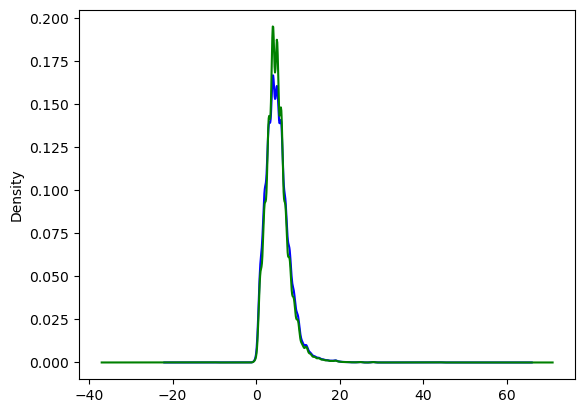

In [43]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)
imputer.fit(dff1[predictor_cols])
train_t = imputer.transform(dff1[predictor_cols])
# train_x = imputer.transform(data.iloc[:,2:])
treated = pd.DataFrame(train_t, columns=dff1[predictor_cols].columns)
treated = treated.apply(np.ceil)

fig = plt.figure()
ax = fig.add_subplot(111)
dff1['number_of_children_c'].plot(kind='kde', ax=ax, color='blue')
treated['number_of_children_c'].plot(kind='kde', ax=ax, color='green')

In [47]:
com=[]
for i in range(dff.shape[0]):
    com.append(calculate_CVD(dff.stroke_qc.iloc[i], dff.transient_ischemic_attack_qc.iloc[i], dff.heartattack_qc.iloc[i], dff.congestive_heart_failure_qc.iloc[i], dff.angina_qc.iloc[i]))
y1=pd.DataFrame(com, columns=['CVD'])

In [48]:
y1['CVD'].value_counts(normalize=True)

0   0.963
1   0.037
Name: CVD, dtype: float64

In [430]:
sexxx = ["Women" if dff[predictor_cols].iloc[i,2] == 0 else "Men" for i in range(dff.shape[0])]
sexx = pd.DataFrame(sexxx)

In [431]:
sexx.value_counts()

Women    6627
Men      5405
dtype: int64

Text(0.5, 0, 'Sex')

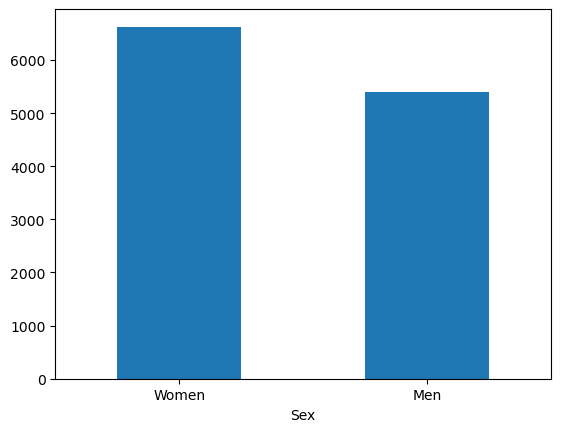

In [433]:
sexxx = ["Women" if dff[predictor_cols].iloc[i,2] == 0 else "Men" for i in range(dff.shape[0])]
sexx = pd.DataFrame(sexxx, columns=['sex'])
sexx["sex"].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Sex")

### Resample the data (Undersampling given the target class imbalance) before split

In [50]:
def resample_dataset(X_train, Y_train):

  negative_ids = Y_train[Y_train == 0].index
  positive_ids = Y_train[Y_train == 1].index
  balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

  X_train = X_train.loc[balanced_ids, :]
  Y_train = Y_train.loc[balanced_ids]
  return X_train, Y_train

In [ ]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    
plot_this(treated[predictor_cols],y1['CVD'],'Original')

In [470]:
pca = PCA(n_components=2).fit(treated[predictor_cols])
pca_2d = pca.transform(treated[predictor_cols])
pca_2d.shape

(12032, 2)

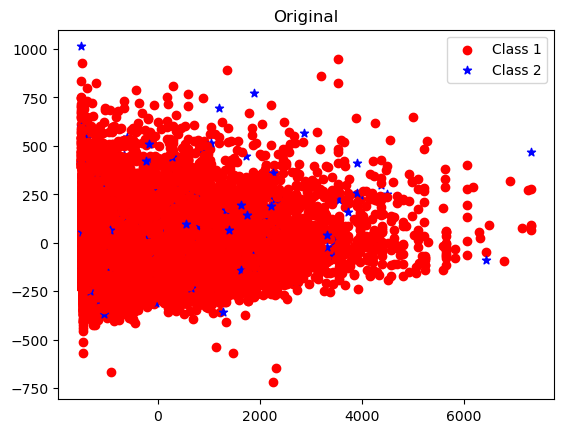

In [475]:
y_rs = y1['CVD']
pca_2d 
for i in range(0, dff1.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')  
pl.legend([c1, c2], ['No CVD event', 'CVD event'])
pl.title('Original')
# pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
pl.show()

Text(0.5, 1.0, 'Original')

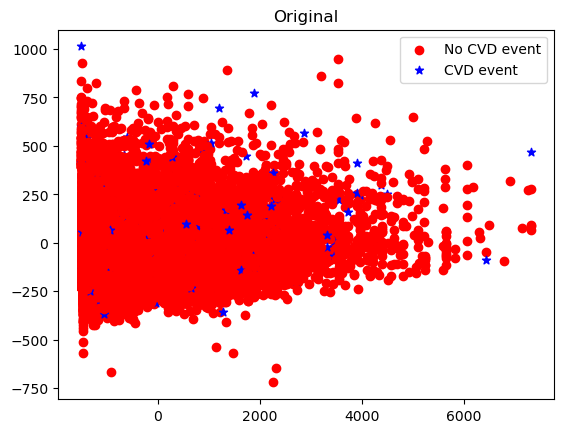

In [493]:
# plt.scatter(pca_2d[:,0],pca_2d[:,1],y1.CVD.values)
# markers = ["*","o"]
# colors = ["b","r"]
# col = y1.CVD.values
# for i, c in enumerate(np.unique(col)):
#     plt.scatter(pca_2d[:,0][col==c],pca_2d[:,1][col==c],c=col[col==c], marker=markers[i], cmap='winter', alpha=0.3)

for i in range(0, dff1.shape[0]):
    if y_rs[i] == 0:
      c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')  
pl.legend([c1, c2], ['No CVD event', 'CVD event'])
pl.title('Original')

In [51]:
dff_X_bal, dff_Y_bal = resample_dataset(treated[predictor_cols], y1)

In [52]:
# Split the data into train and test sets (stratified by sex)
train_features_bal, test_features_bal, train_targets_bal, test_targets_bal = train_test_split(
    dff_X_bal, dff_Y_bal, test_size=0.2, stratify=dff_X_bal[['sex']], random_state=42)

### Resample the data (Undersampling given the target class imbalance) **after** split

In [53]:
# Split the data into train and test sets (stratified by sex)
train_features, test_features, train_targets, test_targets = train_test_split(
    treated[predictor_cols], y1, test_size=0.2, stratify=treated[['sex']], random_state=42)

X_train_bal, Y_train_bal = resample_dataset(train_features, train_targets)

In [54]:
XGB_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("XGBoost", xgb.XGBClassifier())
])

In [55]:
XGB_pipeline.fit(train_features_bal, train_targets_bal)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [56]:
Y_pred_proba = XGB_pipeline.predict_proba(test_features_bal)[:,1]
Y_pred = XGB_pipeline.predict(test_features_bal)

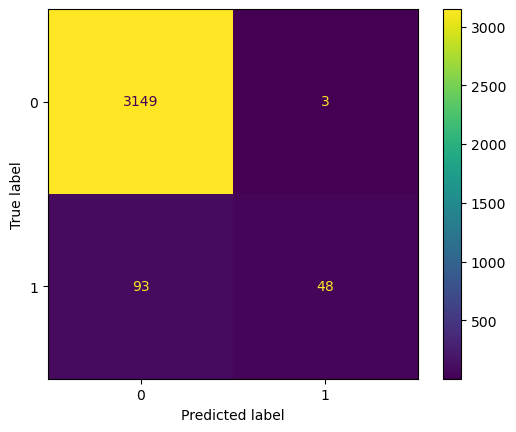

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# y_pred = clf.predict(test_features)
cm = confusion_matrix(test_targets_bal, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

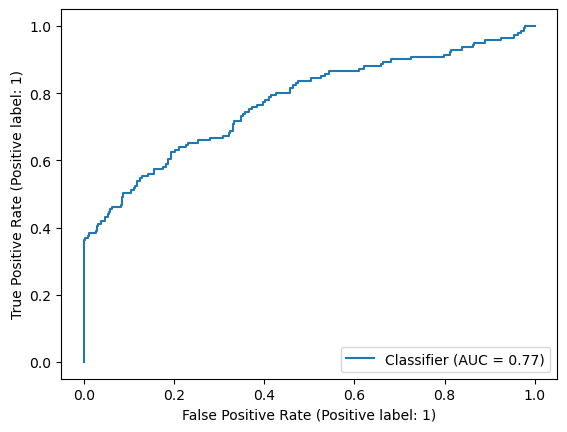

In [57]:
RocCurveDisplay.from_predictions(test_targets_bal, Y_pred_proba)

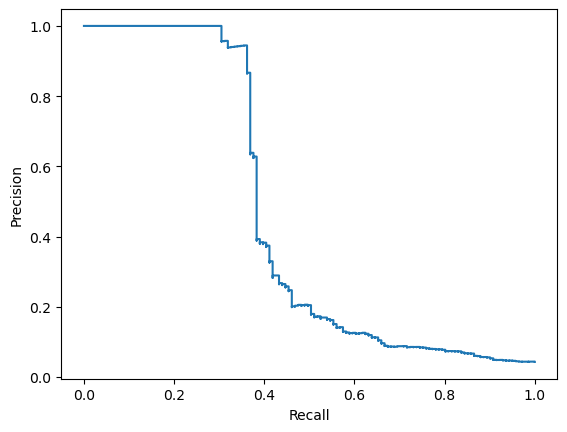

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(test_targets_bal, Y_pred_proba, pos_label=XGB_pipeline.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [92]:
balanced_accuracy_score(test_targets_bal, Y_pred)

0.6697368776325737

## Human-centered Artificial Intelligence
### Model interpretability

The aim is to explain the ML model in a global and local manner. 

Some questions would be:
* Which feature(s) are the most important for predicting CVD cases?
* Given the prediction of certain participants, what role are the feature(s) playing to achieve such outcome?

### Fairness assesssment

The **aim** is to identify the harm and benefits and mitigate or improve them, respectively.

A tentative questions would be: 
* How can we measure fairness or benefits in a machine learning model?
* Which group(s) are more susceptible to harm from the model?

Examples of susceptible groups are sex and even non/smokers. For example, the ML model may be quick to classify smokers as high risk for CVD events, and by extension, denying non-smokers the opportunity for better healthcare.

Therefore, there is a need to check for scenarios such as false negative rate: a scenario where patients are classified as prone to CVD events but the model does not recommend them, and selection rate: a scenarion where patients are effectively classified.

### Explaining the global interpretability

In [95]:
from lime.lime_tabular import LimeTabularExplainer

# Train an interpretable model
interpretable_model = xgb.XGBClassifier()
interpretable_model.fit(train_features_bal, train_targets_bal['CVD'])

# Create an explainer for LIME
explainer_lime = LimeTabularExplainer(train_features_bal.values, feature_names=train_features_bal.columns, class_names=['No CVD', 'CVD'])

# Choose an instance for explanation
instance_idx = np.random.choice(a=test_features_bal.index, size=1)  # Choose the index of the instance you want to explain
print(instance_idx)
# Generate LIME explanation for the chosen instance
lime_exp = explainer_lime.explain_instance(test_features_bal.iloc[33], interpretable_model.predict_proba, num_features=len(test_features_bal.columns))

# Print the explanation
lime_exp.show_in_notebook(show_table=True)

[9585]


In [185]:
# SHAP Analysis
shap.initjs()
model = xgb.XGBClassifier()
model.fit(train_features_bal, train_targets_bal['CVD'])
explainer = shap.Explainer(model, train_features_bal)
shap_values = explainer(test_features_bal)

In [101]:
# SHAP Analysis

explainer1 = shap.TreeExplainer(model, train_features_bal)
shap_values1 = explainer1(test_features_bal)

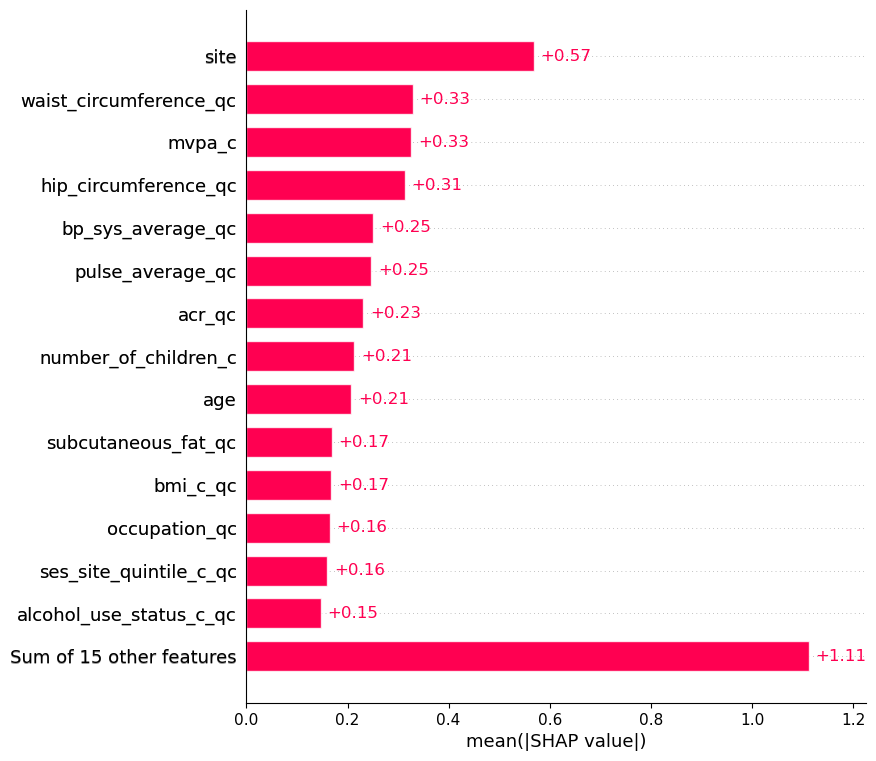

In [103]:
shap.plots.bar(shap_values, max_display=15)

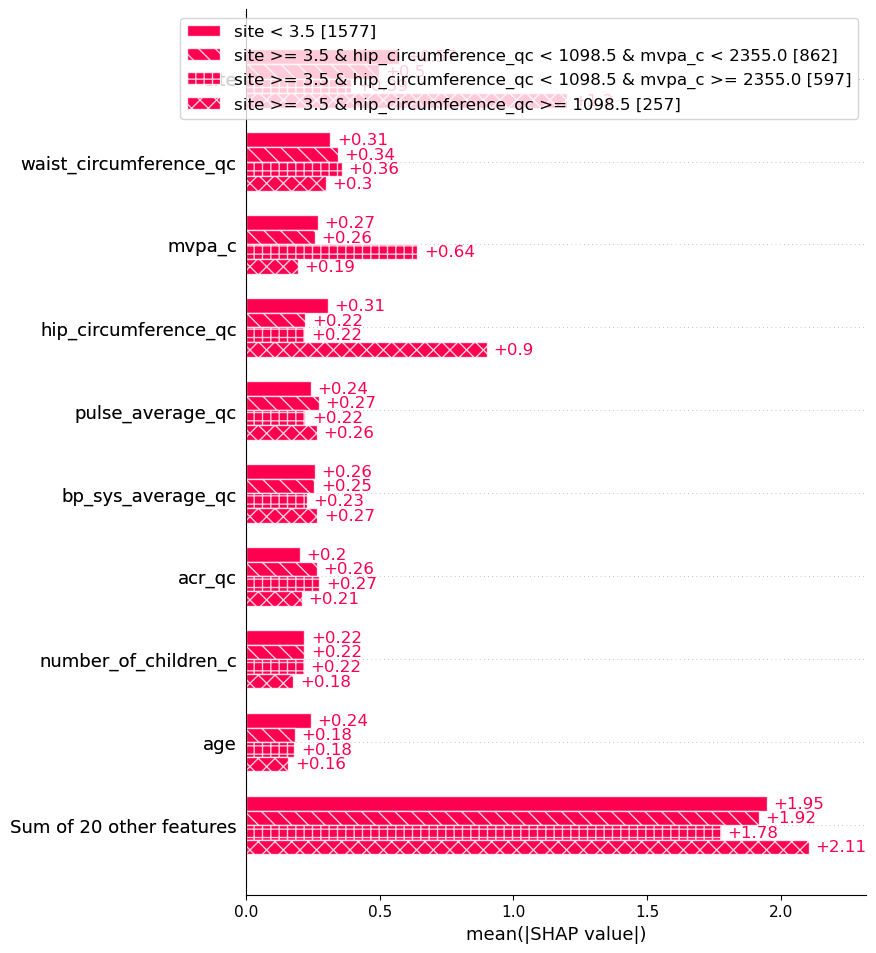

In [462]:
### Can you select only CVD cases and generate SHAP cohorts? - may uncover major cohorts
### for cases of CVD

shap.plots.bar(shap_values.cohorts(4).abs.mean(0))

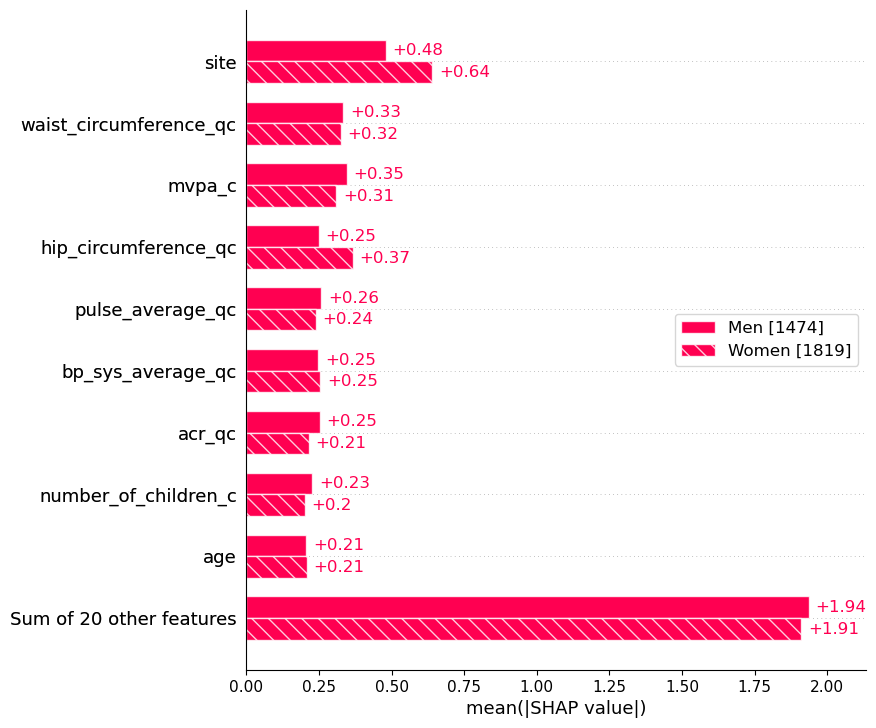

In [463]:
sex = (
    test_features_bal['sex']
    .apply(lambda sex: 'Women' if sex == 0 else 'Men')
    .values
)
#### do for mid point high-low cholesterol (make for only CVD cases)
shap.plots.bar(shap_values.cohorts(sex).abs.mean(axis=0))

In [443]:
shap_values.cohorts(2)

<shap._explanation.Cohorts object with 2 cohorts of sizes: [(1577, 29), (1716, 29)]>

In [1]:
shap.summary_plot(shap_values, plot_type = 'bar' )

NameError: name 'shap' is not defined

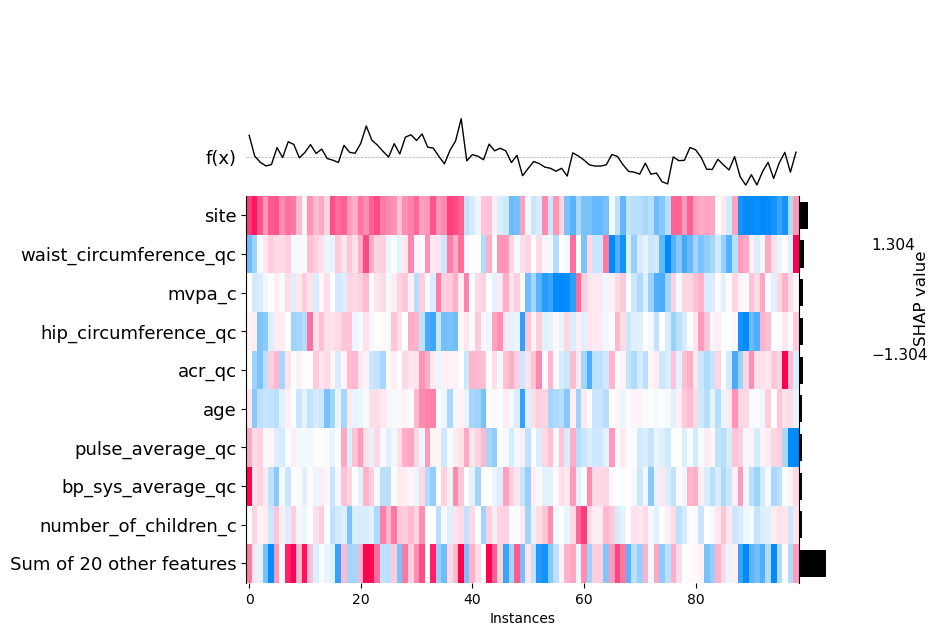

In [125]:
shap.plots.heatmap(shap_values[1:100]) # Do for random instances - np.random.choice

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


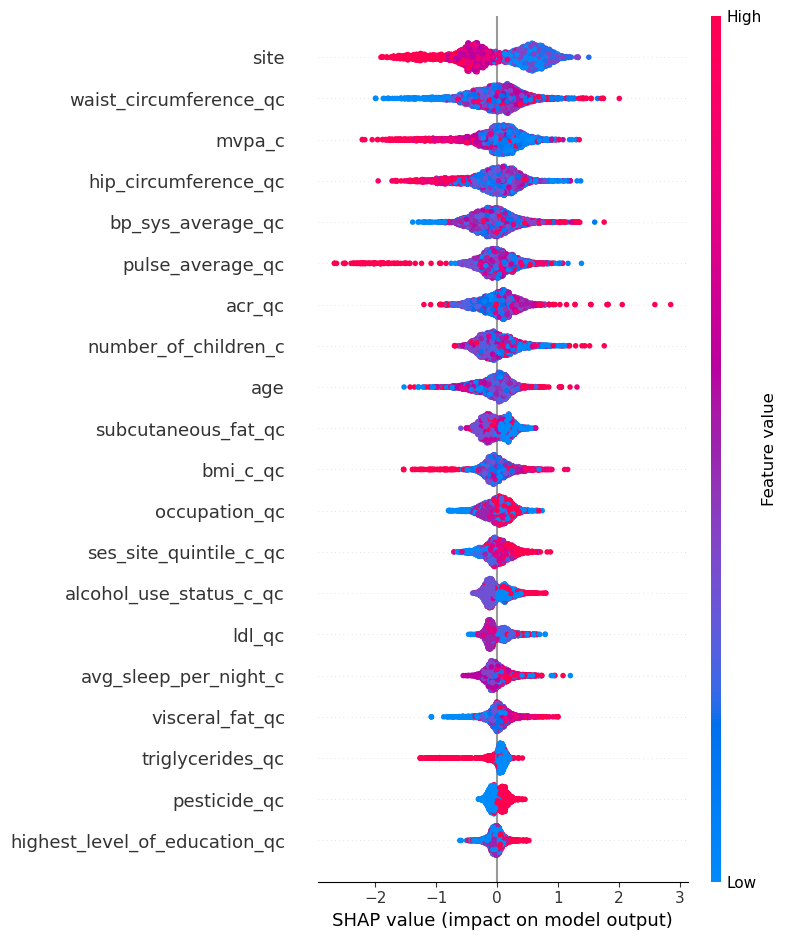

In [105]:
shap.summary_plot(shap_values, test_features_bal, feature_names = test_features_bal.columns)

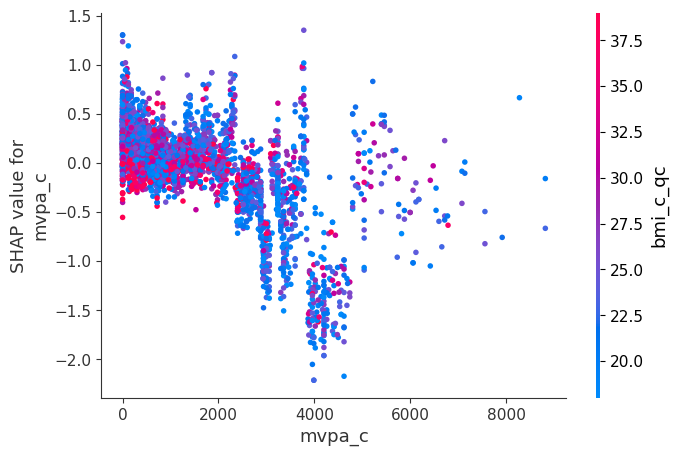

In [107]:
shap.dependence_plot("mvpa_c", shap_values.values, test_features_bal)

In [ ]:
shap.plots.scatter(shap_values[:, 'Age'], color=shap_values[:, 'bmi_c_qc'])

In [114]:
shap.decision_plot(explainer.expected_value, explainer.shap_values(), features = test_features_bal.iloc[33,:])

TypeError: shap_values() missing 1 required positional argument: 'X'

In [116]:
shap.initjs()
# explainer = shap.Explainer(mm)
explainer2 = shap.KernelExplainer(model.predict, test_features_bal)
# shap_values = explainer(X_test)
shap_values2 = explainer2.shap_values(test_features_bal.iloc[50], nsamples=1000)

Using 3293 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [122]:
shap.summary_plot(explainer2, test_features_bal)

AttributeError: 'Kernel' object has no attribute 'shape'

## Explaining the local interpretability

A waterfall plot powerfully shows why a case receives its prediction given its variable values. You start with the bottom of a waterfall plot and add (red) or subtract (blue) the values to get to the final prediction. The graph below shows the prediction for the fifth observation in predictor values. It starts with the **base value** of `-5.109` at the bottom, which is the average of all observations. The model prediction for Observation 1 is `-2.867`, as shown on the top. Why is it `-2.867`? It is because $-5.109+0.79+0.21-0.21+0.22-0.23+0.32+0.37-0.37+0.38+0.77 =$ `-2.867`.

There are values next to the variable names. Those are the values of the variables. For example, the value of hip circumference for the fifth observation is `1064`. Is 1064 good, if compared with all other patients with different hip circumference? Remember the SHAP model is built on the training data set. The means of the variables can be obtained by X_train.mean(). The average “alcohol” of all wines is `977.439` and observation 5 is `1064`. Because the “hip circumference” level contributes positively to the CVD prediction, but the hip circumference of Observation 5 is higher than the average, hence the hip circumference value of this patient contributes negatively to its prediction by $86.561$ as shown below.

In [135]:
train_features_bal.mean()

site                               3.479
age                               51.870
sex                                0.447
number_of_children_c               5.088
partnership_status_c_qc            1.201
highest_level_of_education_qc      0.957
occupation_qc                      2.259
ses_site_quintile_c_qc             3.196
smoking_status_c_qc                0.385
alcohol_use_status_c_qc            1.017
avg_sleep_per_night_c              8.539
mvpa_c                          1479.415
obesity_mom_qc                     0.377
hiv_final_status_c                 0.872
pesticide_qc                       0.501
waist_circumference_qc           864.097
hip_circumference_qc             977.439
waist_hip_r_c_qc                   1.054
bp_sys_average_qc                126.265
pulse_average_qc                  72.244
visceral_fat_qc                    5.704
subcutaneous_fat_qc                2.143
mean_cimt_right_qc                 1.009
mean_cimt_left_qc                  1.015
ldl_qc          

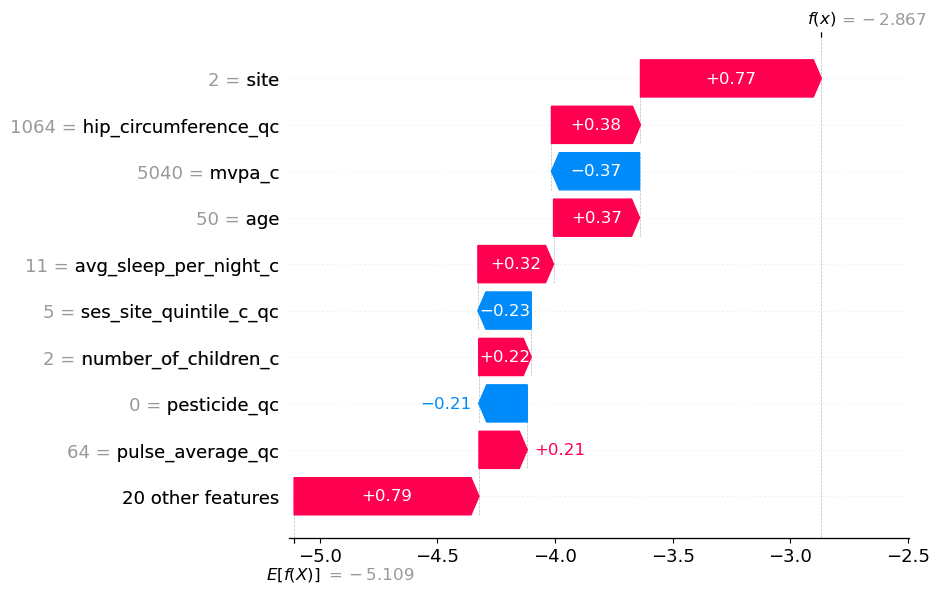

In [129]:
shap.plots.waterfall(shap_values[5])

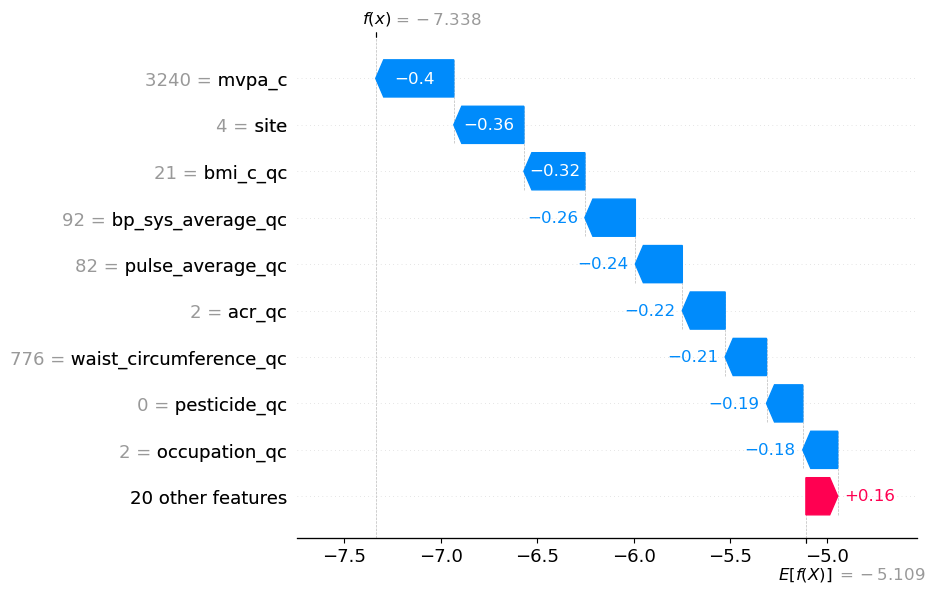

In [131]:
shap.plots.waterfall(shap_values[1])

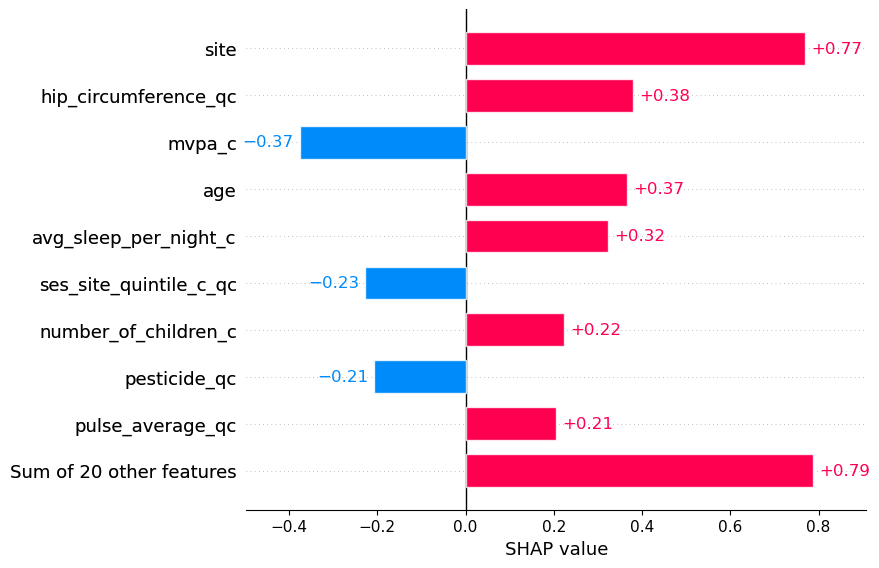

In [137]:
shap.plots.bar(shap_values[5]) # For the fifth observation

In [141]:
explainer5 = shap.TreeExplainer(model)
shap_values5 = explainer5.shap_values(test_features_bal)
# shap.initjs()
def local_explainer(j):
    return(shap.force_plot(explainer.expected_value, shap_values5[j,:], test_features_bal.iloc[j,:]))
local_explainer(0)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [142]:
# local_explainer(5)
local_explainer(50)

The expected value is  -5.109133307702495


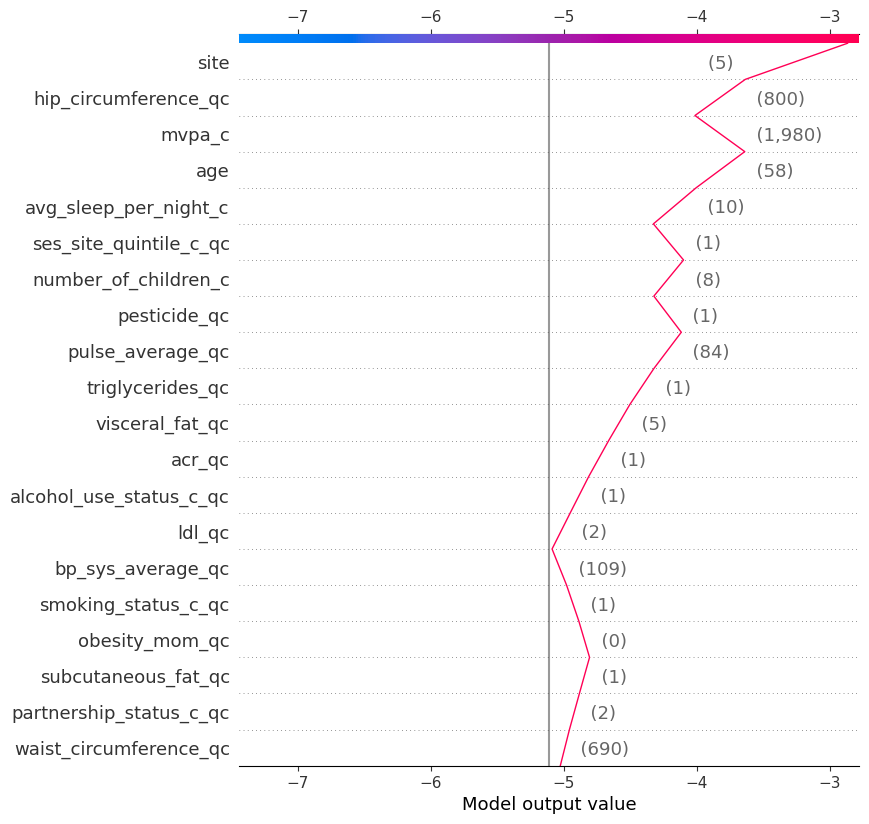

In [145]:
# expected_value = explainer.expected_value
print("The expected value is ", explainer.expected_value)
shap_values_dcesion = explainer.shap_values(test_features_bal)[5]
shap.decision_plot(explainer.expected_value, shap_values_dcesion, test_features_bal)

In [148]:
import math
1/(1+math.exp(5.11) ) # or math.exp(-5.11)/(1+math.exp(-5.11) )

0.005999867227483885

#### Tiny snippet to categorize continuous variables and keep them in a new column. 


In [150]:
# Multiclass
# df['Multiclass'] = np.where(df['quality']>6, 'Best',  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
#                       np.where(df['quality']>5, 'Premium','Value'))
# Y = df['Multiclass']
# X = df[features]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
# xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
# xgb_model.fit(X_train, Y_train)

0.005999867227483885

In [180]:
mmm = pd.DataFrame(test_targets_bal.values, columns=['Actual'])
mmm['Probability'] = model.predict_proba(test_features_bal)[:,1]
mmm['Predicted value'] = model.predict(test_features_bal)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


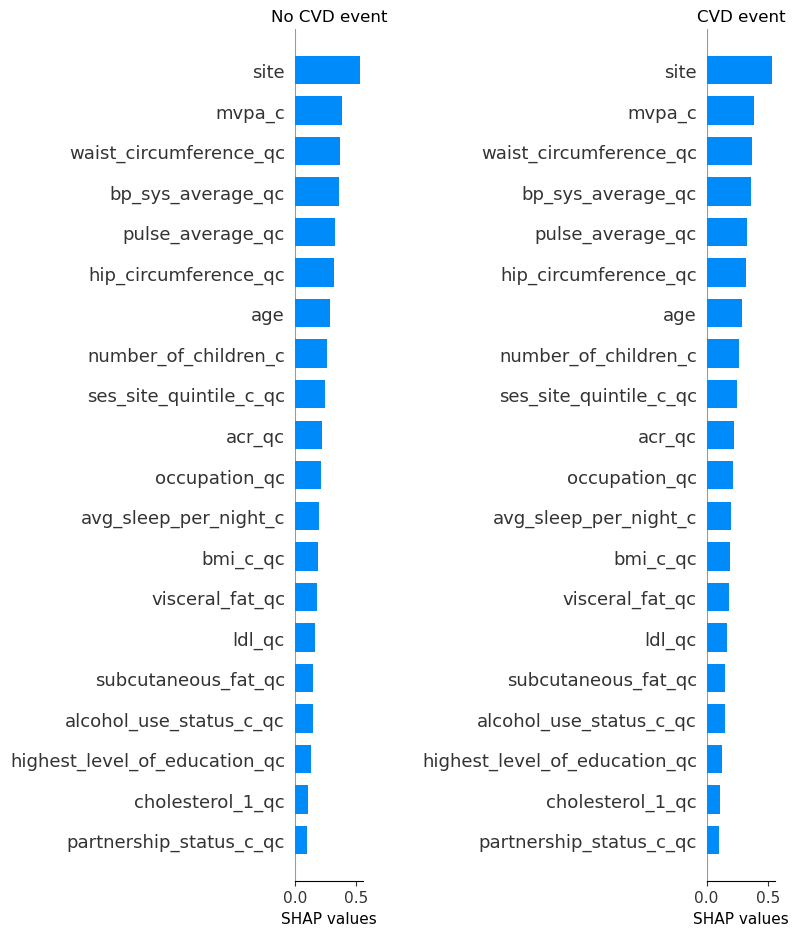

In [407]:
explainer6 = shap.TreeExplainer(model)
shap_values6 = explainer6.shap_values(test_features_bal,approximate=True)

np.shape(shap_values6)
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(121)
ax0.title.set_text('No CVD event')
shap.summary_plot(shap_values6, test_features_bal, plot_type="bar", show=False)
ax0.set_xlabel(r'SHAP values', fontsize=11)
plt.subplots_adjust(wspace = 5)

ax1 = fig.add_subplot(122)
ax1.title.set_text('CVD event')
shap.summary_plot(shap_values6, test_features_bal, plot_type="bar", show=False)
plt.subplots_adjust(wspace = 5)
ax1.set_xlabel(r'SHAP values', fontsize=11)

# plt.tight_layout(pad=3) # You can also use plt.tight_layout() instead of using plt.subplots_adjust() to add space between plots
plt.show()

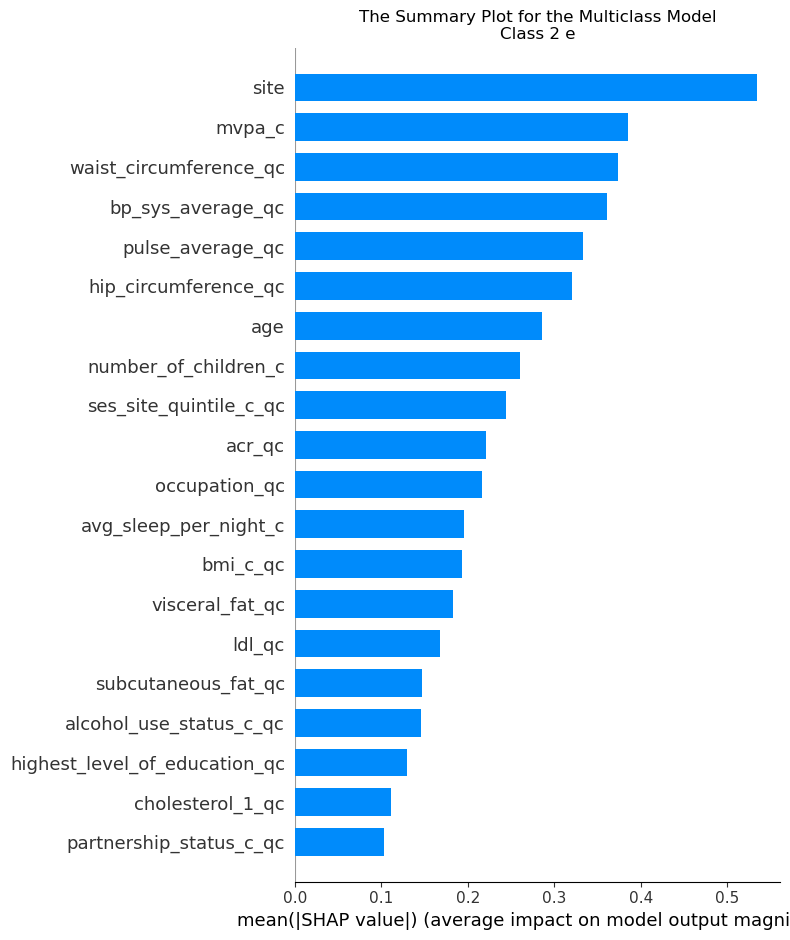

In [197]:
plt.title('The Summary Plot for the Multiclass Model'+'\n'+'Class 2 e')
shap.summary_plot(shap_values6, test_features_bal, plot_type="bar")

### Checking and handling fairness in the ML model

In [63]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.metrics import accuracy_score
from fairlearn.metrics import (
    MetricFrame,
    true_positive_rate,
    false_positive_rate,
    false_negative_rate,
    selection_rate,
    count,
    false_negative_rate_difference
)

from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.postprocessing._interpolated_thresholder import InterpolatedThresholder
from fairlearn.postprocessing._threshold_operation import ThresholdOperation
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds, TruePositiveRateParity

# Train a fairness-aware model using the ExponentiatedGradient algorithm with DemographicParity constraint
sensitive_feature = 'sex'  # Choose the sensitive feature used for fairness considerations
constraint = DemographicParity()
model = xgb.XGBClassifier()
fair_model = ExponentiatedGradient(model, constraint)
fair_model.fit(train_features_bal, train_targets_bal, sensitive_features=train_features_bal[sensitive_feature])

# Evaluate the fairness-aware model
fair_preds = fair_model.predict(test_features_bal)
print("Fairness-Aware Model:")
print(classification_report(test_targets_bal, fair_preds))
print("XGBoost:")
print(classification_report(test_targets_bal, Y_pred))

Fairness-Aware Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3152
           1       1.00      0.35      0.52       141

    accuracy                           0.97      3293
   macro avg       0.99      0.67      0.75      3293
weighted avg       0.97      0.97      0.97      3293

XGBoost:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3152
           1       0.94      0.34      0.50       141

    accuracy                           0.97      3293
   macro avg       0.96      0.67      0.74      3293
weighted avg       0.97      0.97      0.96      3293



In [65]:
display(Markdown("XGBoost:"))
print(recall_score(test_targets_bal, Y_pred))

XGBoost:

0.3404255319148936


In [66]:
from fairlearn.metrics import demographic_parity_difference
print(demographic_parity_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))
from fairlearn.metrics import demographic_parity_ratio
print(demographic_parity_ratio(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))

0.00010034093537148597
0.9932817182817182


In [76]:
from fairlearn.metrics import equalized_odds_difference
print('Equalized Odd Difference:',equalized_odds_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))

from fairlearn.metrics import equalized_odds_ratio
print(equalized_odds_ratio(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values))
from fairlearn.metrics import make_derived_metric, MetricFrame
from sklearn.metrics import recall_score
recall_difference = make_derived_metric(metric=recall_score,
                                       transform='difference')
display(Markdown('Recall difference'))
recall_difference(test_targets_bal.CVD.values,
                                    fair_preds,
                                    sensitive_features=test_features_bal.sex.values)
MetricFrame(metrics=recall_score,
            y_true=test_targets_bal.CVD.values,
            y_pred=fair_preds,
            sensitive_features=test_features_bal.sex.values).difference()

Equalized Odd Difference: 0.04361306324927655


ZeroDivisionError: float division by zero

In [77]:
import functools
from sklearn.metrics import fbeta_score
fbeta_06 = functools.partial(fbeta_score, beta=0.6)
metric_beta = MetricFrame(metrics=fbeta_06,
                          y_true=test_targets_bal.CVD.values,
                          y_pred=fair_preds,
                          sensitive_features=test_features_bal.sex.values)
# metric_beta.difference()
# metric_beta.by_group
# metric_beta.ratio()
metric_beta.overall

Supplied 'func' had no __name__ attribute


0.6680032076984762

In [85]:
s_w = test_features_bal.smoking_status_c_qc
s_p = { 'sample_weight':s_w }
weighted = MetricFrame(metrics=recall_score,
                       y_true=test_targets_bal.CVD,
                       y_pred=fair_preds,
                       sensitive_features=pd.Series(test_features_bal.sex, name='SEX'),
                       sample_params=s_p)
print(weighted.overall)
weighted.by_group

0.35294117647058826


SEX
0.000   0.250
1.000   0.372
Name: recall_score, dtype: float64

In [79]:
tdf = pd.DataFrame(dict(y_true=test_targets_bal.CVD, y_pred=Y_pred, sex=test_features_bal['sex'].astype(str)))

def compute_mf(df:pd.DataFrame) -> pd.DataFrame:
    mf1 = MetricFrame(metrics={"false negative rate":false_negative_rate, "selection rate": selection_rate},
                  y_true=df.y_true,
                  y_pred=df.y_pred,
                  sensitive_features=test_features_bal['sex'])
    return mf1.by_group.reset_index()

compute_mf(tdf)

sex  false negative rate  selection rate
0 0.000                0.659           0.017
1 1.000                0.661           0.014

In [80]:
s_w_1 = test_features_bal.smoking_status_c_qc
s_w_2 = test_features_bal.alcohol_use_status_c_qc
tdd = pd.DataFrame(dict(y_true=test_targets_bal.CVD, y_pred=fair_preds, smoking=s_w_1.astype(str), alcohol=s_w_2))
metrics = {
   'recall' : recall_score,
   'recall_weighted' : recall_score,
   'recall_weight_2' : recall_score
}
s_p = {
    'recall_weighted' : { 'sample_weight':s_w_1 },
    'recall_weight_2' : { 'sample_weight':s_w_2 }
}
def compute_mf2(df:pd.DataFrame) -> pd.DataFrame:
    weighted = MetricFrame(metrics=metrics,
                        y_true=df.y_true,
                        y_pred=df.y_pred,
                        sensitive_features=pd.Series(test_features_bal.sex, name='Sex'),
                        sample_params=s_p)
    return weighted.by_group.reset_index()
compute_mf2(tdd)

Sex  recall  recall_weighted  recall_weight_2
0 0.000   0.329            0.250            0.308
1 1.000   0.373            0.372            0.470

In [84]:
s_w_2 = test_features_bal.alcohol_use_status_c_qc.values
metrics = {
   'recall' : recall_score,
   'recall_weighted' : recall_score,
   'recall_weight_2' : recall_score
}
s_p = {
    'recall_weighted' : { 'sample_weight':s_w },
    'recall_weight_2' : { 'sample_weight':s_w_2 }
}
weighted = MetricFrame(metrics=metrics,
                       y_true=test_targets_bal.CVD.values,
                       y_pred=fair_preds,
                       sensitive_features=pd.Series(test_features_bal.sex, name='SF 0'),
                       sample_params=s_p)
weighted.by_group.reset_index()

SF 0  recall  recall_weighted  recall_weight_2
0 0.000   0.329            0.250            0.308
1 1.000   0.373            0.372            0.470

array([[<Axes: title={'center': 'Accuracy'}, xlabel='sex'>,
        <Axes: title={'center': 'Precision score'}, xlabel='sex'>],
       [<Axes: title={'center': 'False negative rate'}, xlabel='sex'>,
        <Axes: title={'center': 'Selection rate'}, xlabel='sex'>]],
      dtype=object)

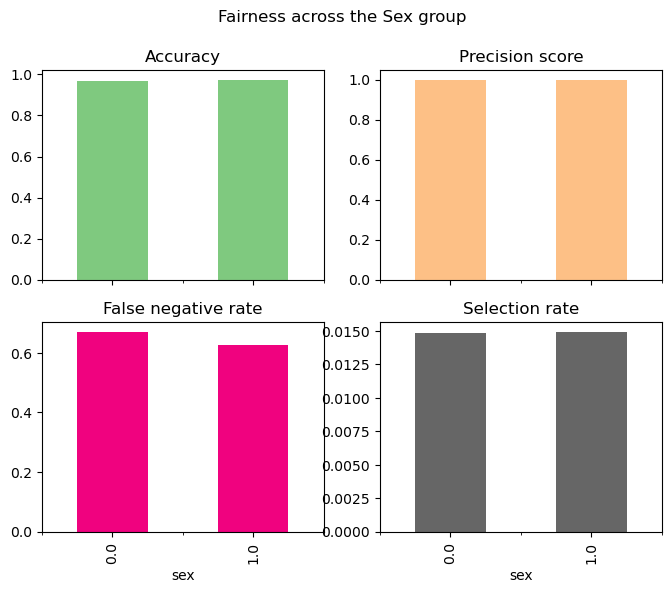

In [87]:
from sklearn.metrics import precision_score
metrics = {
    "Accuracy": accuracy_score,
    "Precision score": precision_score,
    # "false positive rate": false_positive_rate,
     "False negative rate": false_negative_rate,
    "Selection rate": selection_rate,
    # "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=test_targets_bal.CVD, y_pred=fair_preds, sensitive_features=test_features_bal.sex
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[2, 2],
    # ylim=[0, 1],
    legend=False,
    figsize=[8, 6],
    colormap="Accent",
    title="Fairness across the Sex group",
)

In [88]:
from sklearn.metrics import confusion_matrix

# Evaluate the fairness-aware model on the test set
fair_preds = fair_model.predict(test_features_bal)
# print("Fairness-Aware Model:")
# print(classification_report(test_targets['stroke'], fair_preds))

# Calculate the confusion matrix
confusion = confusion_matrix(test_targets_bal.CVD, fair_preds)
# print("Confusion Matrix:")
display(Markdown('__Confusion Matrix:__'))
# display(Markdown(confusion))
print(confusion)

# Identify instances where the model makes mistakes
misclassified_indices = np.where(test_targets_bal.CVD != fair_preds)[0]

# Print example misclassified instances
for idx in misclassified_indices[:5]:
    print("Instance:", idx)
    print("Features:", test_features_bal.iloc[idx])
    print("True Label:", test_targets['CVD'].iloc[idx])
    print("Predicted Label:", fair_preds[idx])
    print("--------------------")

__Confusion Matrix:__

[[3152    0]
 [  92   49]]
Instance: 5
Features: site                               2.000
age                               50.000
sex                                0.000
number_of_children_c               2.000
partnership_status_c_qc            2.000
highest_level_of_education_qc      1.000
occupation_qc                      3.000
ses_site_quintile_c_qc             5.000
smoking_status_c_qc                0.000
alcohol_use_status_c_qc            0.000
avg_sleep_per_night_c             11.000
mvpa_c                          5040.000
obesity_mom_qc                     0.000
hiv_final_status_c                 0.000
pesticide_qc                       0.000
waist_circumference_qc           933.000
hip_circumference_qc            1064.000
waist_hip_r_c_qc                   1.000
bp_sys_average_qc                126.000
pulse_average_qc                  64.000
visceral_fat_qc                    7.000
subcutaneous_fat_qc                3.000
mean_cimt_right_qc                 1.000
mean_cim

In [156]:
from sklearn.preprocessing import StandardScaler
# Get feedback from the user for a specific instance
# from sklearn.preprocessing import scale

scaler = StandardScaler().fit(train_features_bal) 
user_feedback_instance = 3  # Choose the index of the instance for user feedback

# Get the user's feedback (e.g., correct label)
user_correct_label = 1  # Choose the correct label provided by the user

# Update the model using the user's feedback
updated_train_features = train_features_bal.copy()
updated_train_features.iloc[user_feedback_instance] = test_features_bal.iloc[user_feedback_instance]  # Replace the instance in the training set with the user-provided instance
updated_train_targets = train_targets_bal.copy()
updated_train_targets['CVD'].iloc[user_feedback_instance] = user_correct_label  # Replace the label in the training set with the user-provided correct label

# Retrain the model with the updated training set
# fair_model1 = ExponentiatedGradient(model, constraint)
# Define the fairness-aware model using the ExponentiatedGradient algorithm with Demographic Parity fairness constraint
fair_model1 = ExponentiatedGradient(
    model,
    constraints=DemographicParity(),
    # epsilon=0.05  # Fairness tolerance parameter
)
fair_model1.fit(
    scaler.transform(updated_train_features), updated_train_targets['CVD'], 
    sensitive_features=updated_train_features[sensitive_feature])

# Evaluate the updated model
updated_fair_preds = fair_model1.predict(test_features_bal)
display(Markdown("Fairness-Aware Model:"))
print(roc_auc_score(test_targets_bal['CVD'], fair_preds))
print("Updated Fairness-Aware Model:")
print(roc_auc_score(test_targets_bal['CVD'], updated_fair_preds))
# print("Updated Fairness-Aware Model:")
# print(roc_auc_score(test_targets['cardio'], xgb_preds))


Fairness-Aware Model:

0.6737588652482269
Updated Fairness-Aware Model:
0.5


In [91]:
# Measure overall accuracy
overall_accuracy = accuracy_score(test_targets_bal.CVD, fair_preds)
print(" Fair Overall Accuracy:", overall_accuracy)
overall_accuracy = accuracy_score(test_targets_bal.CVD, Y_pred)
print("Overall Accuracy:", overall_accuracy)

 Fair Overall Accuracy: 0.9720619495900394
Overall Accuracy: 0.9708472517461282


In [93]:
model.fit(train_features_bal, train_targets_bal['CVD'])
model.feature_importances_
initial_preds = model.predict(test_features_bal)

# Perform active learning with user feedback
num_instances_to_query = 5  # Number of instances to query for user feedback

# Select the most uncertain instances from the test set
uncertainty_scores = model.predict_proba(test_features_bal)[:, 1]  # Get the probability of the positive class
most_uncertain_indices = np.argsort(np.abs(uncertainty_scores - 0.5))[:num_instances_to_query]
selected_instances = test_features_bal.iloc[most_uncertain_indices]

# Get user feedback for the selected instances
user_feedback_labels = [0, 1, 0, 1, 0]  # Replace with the user-provided feedback labels for the selected instances

# Incorporate the user feedback into the training set
updated_train_features = pd.concat([train_features_bal, selected_instances])
updated_train_target = pd.concat([train_targets_bal['CVD'], pd.Series(user_feedback_labels)])

# Retrain the XGBoost model with the updated training set
updated_xgb_model = xgb.XGBClassifier()
updated_xgb_model.fit(updated_train_features, updated_train_target)

# Evaluate the updated model on the test set
updated_preds = updated_xgb_model.predict(test_features_bal)
print("XGBoost Model:")
print(accuracy_score(test_targets_bal, Y_pred))
print("Fair XGBoost Model:")
print(accuracy_score(test_targets_bal, fair_preds))
print("Updated XGBoost Model:")
print(accuracy_score(test_targets_bal, updated_preds))

XGBoost Model:
0.9708472517461282
Fair XGBoost Model:
0.9720619495900394
Updated XGBoost Model:
0.9705435772851503


In [ ]:
from fugue import transform

def compute_fm(y_true, y_pred, metrics, partitions, engine=None):
    def compute_mf(df:pd.DataFrame) -> pd.DataFrame:
        mf = MetricFrame(metrics=metrics,
                      y_true=df.y_true,
                      y_pred=df.y_pred,
                      sensitive_features=df[list(partitions.keys())])
        return mf.by_group.reset_index()

    tdf = pd.DataFrame(dict(y_true=y_true, y_pred=y_pred, **partitions))
    schema = "*-y_true,y_pred+"+",".join([f"{x}:double" for x in metrics.keys()])
    
    return transform(
        tdf,
        compute_mf,
        schema=schema,
        partition=dict(by=list(partitions.keys())),
        engine=engine,
        as_local=True
    )
    
    

In [207]:
# You can also evaluate multiple metrics by providing a dictionary

metrics_dict = {
    "selection_rate": selection_rate,
    "false_negative_rate": false_negative_rate,
    "balanced_accuracy": balanced_accuracy_score,
}

metricframe_unmitigated = MetricFrame(metrics=metrics_dict,
                  y_true=test_targets_bal,
                  y_pred=Y_pred,
                  sensitive_features=test_features_bal.sex)

# The disaggregated metrics are then stored in a pandas DataFrame:

metricframe_unmitigated.by_group.reset_index()

sex  selection_rate  false_negative_rate  balanced_accuracy
0 0.000           0.017                0.659              0.670
1 1.000           0.014                0.661              0.669

In [208]:
metricframe_unmitigated.difference()

selection_rate        0.003
false_negative_rate   0.002
balanced_accuracy     0.000
dtype: float64

In [209]:
# You'll probably want to view them transposed:

pd.DataFrame({'difference': metricframe_unmitigated.difference(),
              'ratio': metricframe_unmitigated.ratio(),
              'group_min': metricframe_unmitigated.group_min(),
              'group_max': metricframe_unmitigated.group_max()}).T

selection_rate false_negative_rate balanced_accuracy
difference          0.003               0.002             0.000
ratio               0.797               0.996             0.999
group_min           0.014               0.659             0.669
group_max           0.017               0.661             0.670

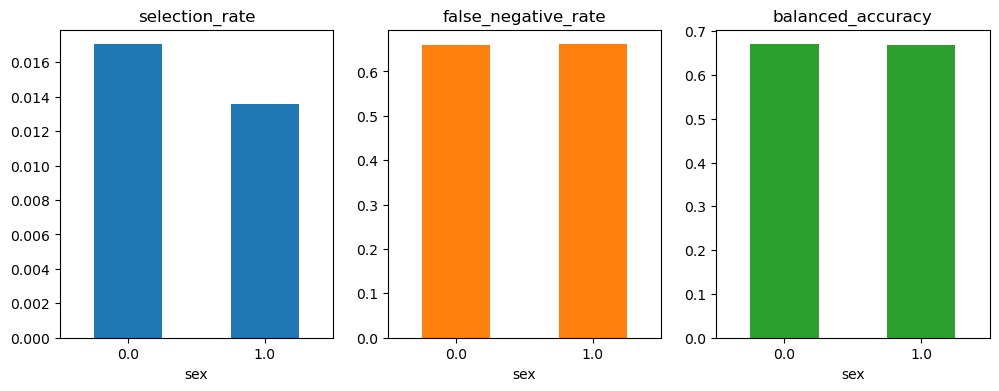

In [213]:
# You can also easily plot all of the metrics using DataFrame plotting capabilities

metricframe_unmitigated.by_group.plot.bar(subplots=True, layout= [1,3], figsize=(12, 4),
                      legend=False, rot=0, position=0.5);

For a large difference in false negative rates between the groups, we need to implement **algorithmic mitigation strategies** of this fairness issue (and similar ones).

*Note that while we currently focus on the training stage of the AI lifecycle mitigation should not be limited to this stage. In fact, we have already discussed mitigation strategies that are applicable at the task definition stage (e.g., checking for construct validity) and data collection stage (e.g., collecting more data).*

Within the model training stage, mitigation may occur at different steps relative to model training:

* **Preprocessing**: A mitigation algorithm is applied to transform the input data to the training algorithm; for example, some strategies seek to remove and dependence between the input features and sensitive features.

* **At training time**: $\text{The model is trained by an (optimization) algorithm that seeks to satisfy fairness constraints.}$

* **Postprocessing**: The output of a trained model is transformed to mitigate fairness issues; for example, the predicted probability of CVD event is thresholded according to a group-specific threshold.

We will now dive into two algorithms: a postprocessing approach and a reductions approach (which is a training-time algorithm). Both of them are in fact **meta-algorithms** in the sense that they act as wrappers around *any* standard (fairness-unaware) machine learning algorithms. This makes them quite versatile in practice.

### The $\text{ThresholdOptimizer}$

The Threshold optimizer is a **Postprocessing** technique; a class of unfairness-mitigation algorithms that take an already trained model and a dataset as an input and seek to fit a transformation function to model's outputs to satisfy some (group) fairness constraint(s). They might be the only feasible unfairness mitigation approach when developers cannot influence training of the model, due to practical reasons or due to security or privacy.

The $\text{ThresholdOptimizer}$ takes:

*   An existing `estimator` that we wish to threshold. 
*   The fairness `constraints` we want to satisfy.
*   The `objective` metric we want to maximize.

In [203]:
postprocess_est = ThresholdOptimizer(
    estimator=XGB_pipeline,
    constraints="false_negative_rate_parity",
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method='predict_proba'
)

In [205]:
postprocess_est.fit(train_features_bal, train_targets_bal, sensitive_features=train_features_bal.sex)

ThresholdOptimizer(constraints='false_negative_rate_parity',
                   estimator=Pipeline(steps=[('preprocessing',
                                              StandardScaler()),
                                             ('XGBoost',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=0, gpu...
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_bin=256,
                                                            max_cat_threshold=64,
                                                            max_cat_to_onehot=4,
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            max_leaves=0,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=0,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0, ...))]),
                   objective='balanced_accuracy_score',
                   predict_method='predict_proba', prefit=True)

In [214]:
# Record and evaluate the output of the trained ThresholdOptimizer on test data

Y_pred_postprocess = postprocess_est.predict(test_features_bal, sensitive_features=test_features_bal.sex)
metricframe_postprocess = MetricFrame(
    metrics=metrics_dict,
    y_true=test_targets_bal,
    y_pred=Y_pred_postprocess,
    sensitive_features=test_features_bal.sex
)

In [215]:
pd.concat([metricframe_unmitigated.by_group,
           metricframe_postprocess.by_group],
           keys=['Unmitigated', 'ThresholdOptimizer'],
           axis=1)

Unmitigated                                       ThresholdOptimizer  \
      selection_rate false_negative_rate balanced_accuracy     selection_rate   
sex                                                                             
0.000          0.017               0.659             0.670              0.024   
1.000          0.014               0.661             0.669              0.018   

                                             
      false_negative_rate balanced_accuracy  
sex                                          
0.000               0.659             0.666  
1.000               0.593             0.702

In [216]:
pd.concat([metricframe_unmitigated.difference(),
           metricframe_postprocess.difference()],
          keys=['Unmitigated: difference', 'ThresholdOptimizer: difference'],
          axis=1).T

selection_rate  false_negative_rate  \
Unmitigated: difference                  0.003                0.002   
ThresholdOptimizer: difference           0.005                0.065   

                                balanced_accuracy  
Unmitigated: difference                     0.000  
ThresholdOptimizer: difference              0.036

array([[<Axes: title={'center': 'selection_rate'}, xlabel='sex'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='sex'>,
        <Axes: title={'center': 'balanced_accuracy'}, xlabel='sex'>]],
      dtype=object)

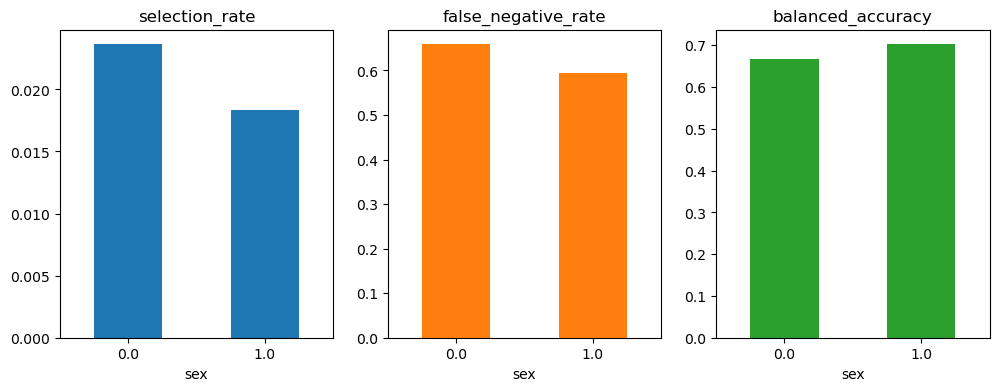

In [218]:
metricframe_postprocess.by_group.plot.bar(subplots=True, layout=[1,3], figsize=(12, 4), legend=False, rot=0, position=0.5)

## Reductions approach with $\text{ExponentiatedGradient}$

In [494]:
from sklearn.linear_model import LogisticRegression
random_seed = 42;
expgrad_est = ExponentiatedGradient(
    estimator=LogisticRegression(max_iter=2000, random_state=random_seed),
    constraints=TruePositiveRateParity(difference_bound=0.02)
)

The constraints above are expressed for the true positive parity, they require that the difference between the largest and the smallest true positive rate (TPR) across all groups be at most 0.02. Since false negative rate (FNR) is equal to 1-TPR, this is equivalent to requiring that the difference between the largest and smallest FNR be at most 0.02.

In [495]:
# Fit the exponentiated gradient model
expgrad_est.fit(train_features_bal, train_targets_bal, sensitive_features=train_features_bal.sex)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.TruePositiveRateParity object at 0x7fa581f3a940>,
                      estimator=LogisticRegression(max_iter=5000,
                                                   random_state=42),
                      nu=0.0008180187108884987)

In [496]:
# Record and evaluate predictions on test data

Y_pred_reductions = expgrad_est.predict(test_features_bal, random_state=random_seed)
metricframe_reductions = MetricFrame(
    metrics=metrics_dict,
    y_true=test_targets_bal,
    y_pred=Y_pred_reductions,
    sensitive_features=test_features_bal.sex
)
metricframe_reductions.by_group.reset_index()

sex  selection_rate  false_negative_rate  balanced_accuracy
0    0.000           0.000                1.000              0.500
1    1.000           0.000                1.000              0.500
2 7434.547           0.000                0.000              1.000

In [224]:
# Evaluate the difference between the largest and smallest value of each metric
metricframe_reductions.difference()

selection_rate        0.000
false_negative_rate   0.000
balanced_accuracy     0.000
dtype: float64

Individual predictors

During the training process, the $\text{ExponentiatedGradient}$ algorithm iteratively trains multiple inner models on a reweighted training dataset. The algorithm stores each of these predictors and then randomizes among them at deployment time.

In many applications, the randomization is undesirable, and also using multiple inner models can pose issues for interpretability. However, the inner models that $\text{ExponentiatedGradient}$ relies on span a variety of fairness-accuracy trade-offs, and they could be considered for stand-alone deployment: addressing the randomization and interpretability issues, while possibly offering additional flexibility thanks to a variety of trade-offs. 

In this section explore the performance of the individual predictors learned by the $\text{ExponentiatedGradient}$ algorithm. First, note that since the base estimator was $\text{LogisticRegression}$ all these predictors are different logistic regression models:

In [225]:
predictors = expgrad_est.predictors_
predictors

0    LogisticRegression(max_iter=1000, random_state...
dtype: object

In [226]:
# Collect predictions by all predictors and calculate balanced error
# as well as the false negative difference for all of them

sweep_preds = [clf.predict(test_features_bal) for clf in predictors]
balanced_error_sweep = [1-balanced_accuracy_score(test_targets_bal, Y_sweep) for Y_sweep in sweep_preds]
fnr_diff_sweep = [false_negative_rate_difference(test_targets_bal, Y_sweep, sensitive_features=test_features_bal.sex) for Y_sweep in sweep_preds]

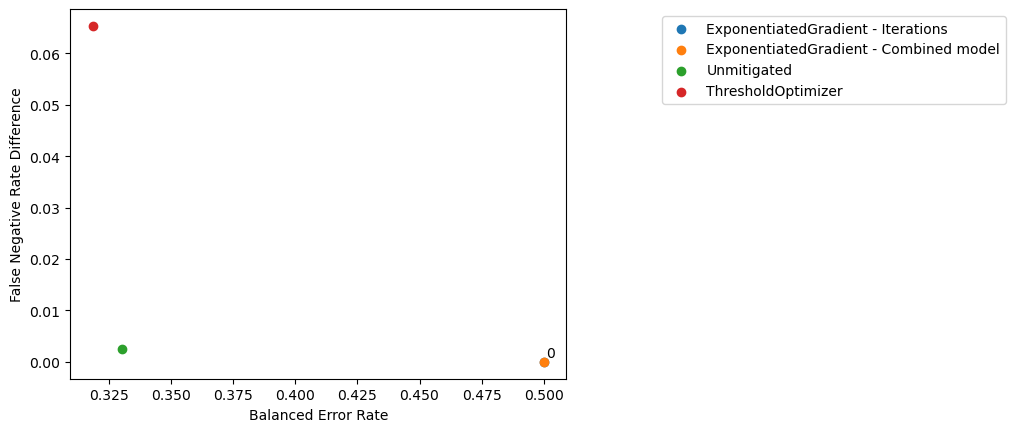

In [227]:
# Show the balanced error / fnr difference values of all predictors on a raster plot  

plt.scatter(balanced_error_sweep, fnr_diff_sweep, label="ExponentiatedGradient - Iterations")
for i in range(len(predictors)):
  plt.annotate(str(i), xy=(balanced_error_sweep[i]+0.001, fnr_diff_sweep[i]+0.001))

# Also include in the plot the combined ExponentiatedGradient model
# as well as the three previously fitted models

plt.scatter(1-balanced_accuracy_score(test_targets_bal, Y_pred_reductions),
            false_negative_rate_difference(test_targets_bal, Y_pred_reductions, sensitive_features=test_features_bal.sex),
            label="ExponentiatedGradient - Combined model")
plt.scatter(1-balanced_accuracy_score(test_targets_bal, Y_pred),
            false_negative_rate_difference(test_targets_bal, Y_pred, sensitive_features=test_features_bal.sex),
            label="Unmitigated")
plt.scatter(1-balanced_accuracy_score(test_targets_bal, Y_pred_postprocess),
            false_negative_rate_difference(test_targets_bal, Y_pred_postprocess, sensitive_features=test_features_bal.sex),
            label="ThresholdOptimizer")

plt.xlabel("Balanced Error Rate")
plt.ylabel("False Negative Rate Difference")
plt.legend(bbox_to_anchor=(1.9,1))
plt.show()

## Comparing performance of different techniques

Now we have covered two different class of techniques for mitigating the fairness-related harms we found in our fairness-unaware model. In this section, we will compare the performance of the models we trained above across our key metrics.

In [228]:
def plot_technique_comparison(mf_dict, metric):
  """
  Plots a specified metric for a given dictionary of MetricFrames.
  """
  mf_dict = {k:v.by_group[metric] for (k,v) in mf_dict.items()}
  comparison_df = pd.DataFrame.from_dict(mf_dict)
  comparison_df.plot.bar(figsize=(12, 6), legend=False)
  plt.title(metric)
  plt.xticks(rotation=0, ha='center');
  plt.legend(bbox_to_anchor=(1.01,1), loc='upper left')

In [229]:
test_dict = {
    "Reductions": metricframe_reductions,
    "Unmitigated": metricframe_unmitigated,
    "Postprocessing": metricframe_postprocess
}

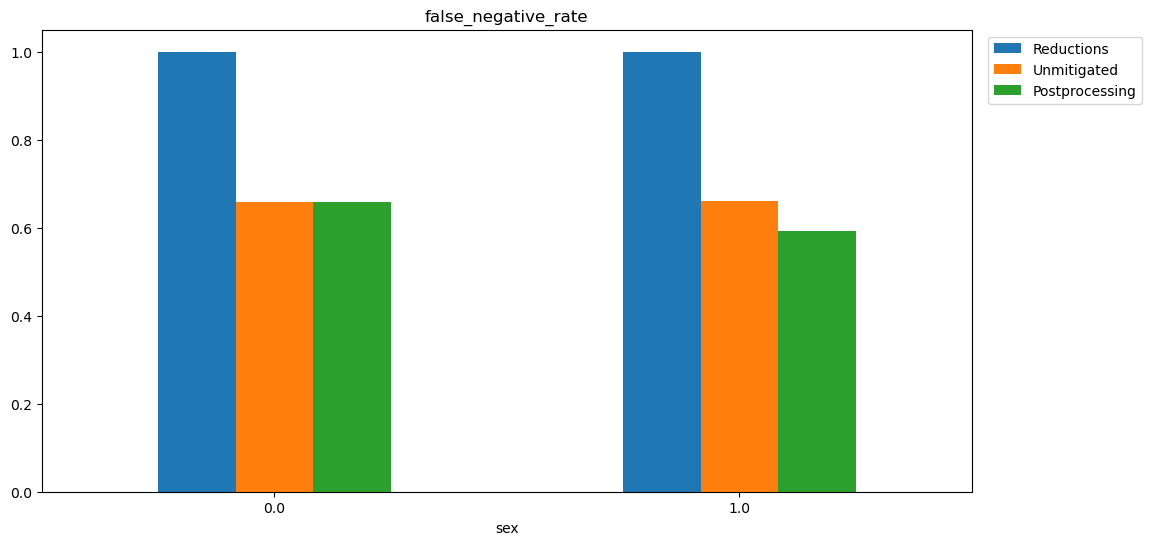

In [230]:
plot_technique_comparison(test_dict, "false_negative_rate")

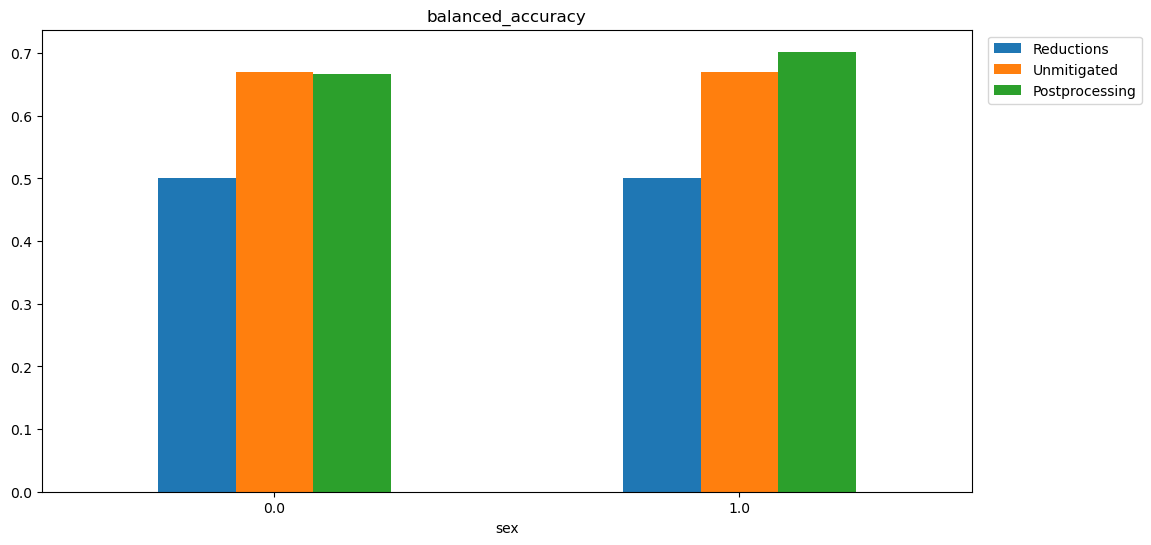

In [231]:
plot_technique_comparison(test_dict, "balanced_accuracy")

In [232]:
overall_df = pd.DataFrame.from_dict({
    "Unmitigated": metricframe_unmitigated.overall,
    "Postprocessing": metricframe_postprocess.overall,
    "Reductions": metricframe_reductions.overall
})

In [233]:
overall_df.T

selection_rate  false_negative_rate  balanced_accuracy
Unmitigated              0.015                0.660              0.670
Postprocessing           0.021                0.631              0.682
Reductions               0.000                1.000              0.500

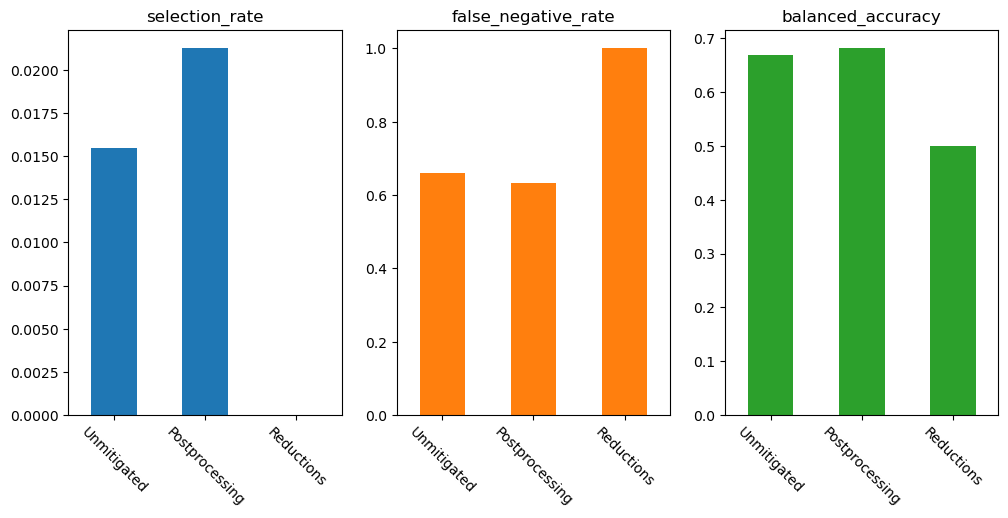

In [262]:
overall_df.transpose().plot.bar(subplots=True, layout= [1,3], figsize=(12, 5), legend=False, rot=-45, position=0.5);

## Counterfactual Analysis and Optimization

Counterfactuals are a branch of Human-centered AI systems that allows for interaction with the model. It also demystifies the black-box problem in AI, opening a variety of interaction from the doamin experts and the model.

In [349]:
import numpy as np
import random
# from sklearn.metrics import accuracy_score

model1 = xgb.XGBClassifier()
model1.fit(train_features_bal, train_targets_bal)
Y11 = model1.predict(test_features_bal)
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = np.copy(position)
        self.best_fitness = float('-inf')

class PSO:
    def __init__(self, num_particles, num_dimensions, lower_bounds, upper_bounds, max_iterations):
        self.num_particles = num_particles
        self.num_dimensions = num_dimensions
        self.lower_bounds = lower_bounds
        self.upper_bounds = upper_bounds
        self.max_iterations = max_iterations
        self.global_best_position = None
        self.global_best_fitness = float('-inf')
        self.particles = []

    def initialize_particles(self):
        for _ in range(self.num_particles):
            position = np.random.uniform(self.lower_bounds, self.upper_bounds, self.num_dimensions)
            particle = Particle(position)
            self.particles.append(particle)

    def update_particle_velocity(self, particle):
        inertia_weight = 0.5
        cognitive_weight = 1.0
        social_weight = 1.0

        r1 = random.random()
        r2 = random.random()

        cognitive_velocity = cognitive_weight * r1 * (particle.best_position - particle.position)
        social_velocity = social_weight * r2 * (self.global_best_position - particle.position)

        particle.velocity = inertia_weight * particle.velocity + cognitive_velocity + social_velocity

    def update_particle_position(self, particle):
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, self.lower_bounds, self.upper_bounds)

    def optimize(self, objective_function, model):
        self.initialize_particles()

        for _ in range(self.max_iterations):
            for particle in self.particles:
                fitness = objective_function(particle.position, model)

                if fitness > particle.best_fitness:
                    particle.best_position = np.copy(particle.position)
                    particle.best_fitness = fitness

                if fitness > self.global_best_fitness:
                    self.global_best_position = np.copy(particle.position)
                    self.global_best_fitness = fitness

                self.update_particle_velocity(particle)
                self.update_particle_position(particle)

        return self.global_best_position, self.global_best_fitness

def objective_function(variables, model1, observation = np.where(Y11==1)[0][0]):
    # Modify the variables and evaluate the fitness based on change from 1 to 0 in the target variable
    # observation = 69
    # row = test_features_bal.iloc[observation,:]
    concerned_variables_idx = [test_features_bal.columns.get_loc(c) for c in 
     ['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc'] if c in test_features_bal]
    modified_variables = test_features_bal
    # print(Y_pred[observation])
    modified_variables.iloc[observation,concerned_variables_idx] = variables  # Modify the variables as required
    predicted_values = model1.predict(modified_variables)
    obs = np.where(predicted_values==1)[0][0]
    fitness = predicted_values[observation]
    print('CVD event: \t',predicted_values[obs])
    print(fitness)

    return -fitness
# test_targets_bal.iloc[69]
# Example usage
num_particles = 50
num_dimensions = 3
lower_bounds = [10, 3.0, 10]
upper_bounds = [8800, 14.0, 300]
max_iterations = 100

# Create your machine learning model object
# model = None  # Replace None with your machine learning model

# Create PSO object and optimize
pso = PSO(num_particles, num_dimensions, lower_bounds, upper_bounds, max_iterations)
best_position, best_fitness = pso.optimize(objective_function, model1)
concerned_variables_idx = [test_features_bal.columns.get_loc(c) for c in 
     ['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc'] if c in test_features_bal]
CC=test_features_bal.iloc[np.where(Y11==1)[0][0],concerned_variables_idx]
ppp = pd.DataFrame(dict(XXX=CC, YYY=Y11[np.where(Y11==1)[0][0]]),columns=['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc', 'CVD'])
print("Best Position:", best_position)
print("Best Fitness:", best_fitness)


CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
1
CVD event: 	 1
0
CVD event: 	 1

In [360]:
concerned_variables_idx = [test_features_bal.columns.get_loc(c) for c in 
     ['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc'] if c in test_features_bal]
CC=test_features_bal.iloc[np.where(Y11==1)[0][0],concerned_variables_idx]
ppp = pd.DataFrame(dict(XXX=CC, YYY=Y11[np.where(Y11==1)[0][0]]),columns=['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc', 'CVD'])

In [392]:

# ppp['mvpa_c'] = CC.mvpa_c
# ppp['bmi_c_qc'] = CC.bmi_c_qc
# ppp['cholesterol_1_qc'] = CC.cholesterol_1_qc
CC.values

array([1154.05694865,    5.97006157,   72.63673153])

In [406]:
np.concatenate(CC.values.T, np.asarray(1))

ValueError: zero-dimensional arrays cannot be concatenated

In [393]:
ppp=pd.DataFrame(best_position.reshape(1,3),columns=['mvpa_c', 'bmi_c_qc', 'cholesterol_1_qc'])
ppp['CVD'] = best_fitness
ppp.iloc[1,:]=[CC.values,1]
ppp

IndexError: iloc cannot enlarge its target object

In [385]:
best_position.reshape(1,3)

array([[644.29428973,   5.45794163,  71.98391642]])